In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

In [2]:
data = pd.read_csv('data/train-balanced-sarcasm.csv')
data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [3]:
df = data[['label', 'comment']].dropna()
df

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.
...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...
1010822,1,"whatever you do, don't vote green!"
1010823,1,Perhaps this is an atheist conspiracy to make ...
1010824,1,The Slavs got their own country - it is called...


In [4]:
comments = df['comment'].to_numpy()
targets = df['label'].to_numpy()

comments = np.array(comments)
targets = np.array(targets)

In [5]:
token = Tokenizer()
token.fit_on_texts(comments)
word_index=token.word_index
len(word_index)

180583

In [6]:
def word_to_seq(s):
    return tf.keras.preprocessing.sequence.pad_sequences(token.texts_to_sequences([s]), maxlen=maxlen)

In [7]:
maxlen=max([len(i.split()) for i in comments])
print(maxlen)
train_data = word_to_seq(comments.tolist())
input_size = len(train_data)
train_data = np.array(train_data)
total=len(word_index)
print(train_data.shape[1])

2222
2222


In [12]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(total, 128, input_length=maxlen),
        tf.keras.layers.LSTM(256),
        tf.keras.layers.Dropout(0.1),  
        tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2222, 128)         23114624  
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 23,509,378
Trainable params: 23,509,378
Non-trainable params: 0
_________________________________________________________________


In [13]:
history=model.fit(train_data[0], targets, epochs=10, validation_split=0.2)

Epoch 1/10
56/56 [==============================] - 17s 299ms/step - loss: 0.5503 - accuracy: 0.9015 - val_loss: 0.4249 - val_accuracy: 0.8697
Epoch 2/10
56/56 [==============================] - 16s 285ms/step - loss: 0.2761 - accuracy: 0.9128 - val_loss: 0.4212 - val_accuracy: 0.8674
Epoch 3/10
56/56 [==============================] - 16s 284ms/step - loss: 0.1752 - accuracy: 0.9415 - val_loss: 0.4631 - val_accuracy: 0.8562
Epoch 4/10
56/56 [==============================] - 16s 293ms/step - loss: 0.1221 - accuracy: 0.9629 - val_loss: 0.5097 - val_accuracy: 0.8449
Epoch 5/10
56/56 [==============================] - 17s 307ms/step - loss: 0.1141 - accuracy: 0.9623 - val_loss: 0.5304 - val_accuracy: 0.8382
Epoch 6/10
56/56 [==============================] - 18s 321ms/step - loss: 0.1102 - accuracy: 0.9589 - val_loss: 0.5206 - val_accuracy: 0.8472
Epoch 7/10
56/56 [==============================] - 17s 296ms/step - loss: 0.1078 - accuracy: 0.9589 - val_loss: 0.5349 - val_accuracy: 0.8382

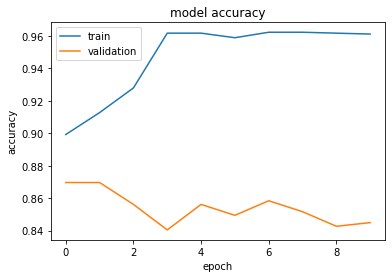

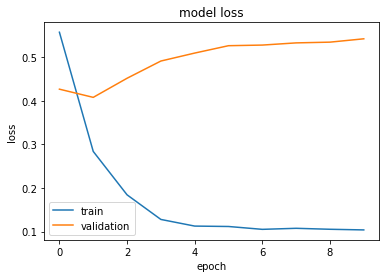

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()
#DropOut = 0.4

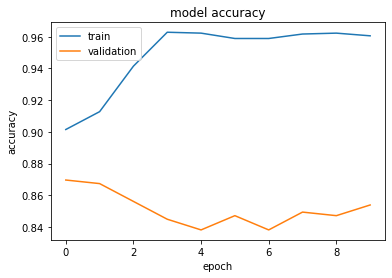

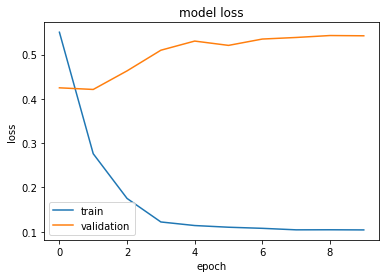

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()
#DropOut = 0.1